In [42]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/cansuborak/Lego-Analysis/main/Lego_dataset/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/cansuborak/Lego-Analysis/main/Lego_dataset/parent_themes.csv')
sets = pd.read_csv('https://raw.githubusercontent.com/cansuborak/Lego-Analysis/main/Lego_dataset/sets.csv')
themes = pd.read_csv('https://raw.githubusercontent.com/cansuborak/Lego-Analysis/main/Lego_dataset/themes.csv')



In [28]:
# Dataset - Lego Sets
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [50]:
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [52]:
# Merging the data sets

merged = df.merge(parent_theme, left_on='parent_theme', right_on='name')

merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False


In [54]:
# Removing duplicate columns

merged = merged.drop(columns='name_y')

merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [62]:
# Checking for missing values

merged[merged['set_num'].isnull()].shape


(153, 8)

In [60]:
# 1. Inspect the merged DataFrame

print("Merged DataFrame shape:", merged.shape)
print("\nFirst few rows of merged:")
print(merged.head())

Merged DataFrame shape: (11986, 8)

First few rows of merged:
  set_num                      name_x  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme   id  is_licensed  
0     Legoland  411        False  
1         Town   50        False  
2       Castle  186        False  
3        Space  126        False  
4        Space  126        False  


In [64]:
# 2. Double-check your columns

print("\nMerged DataFrame columns:")
print(merged.columns)


Merged DataFrame columns:
Index(['set_num', 'name_x', 'year', 'num_parts', 'theme_name', 'parent_theme',
       'id', 'is_licensed'],
      dtype='object')


In [66]:
# 3. Check for missing values in the merged dataset
#    You already checked set_num specifically; let's do a broader check.
null_counts = merged.isnull().sum()
print("\nNumber of missing values in each column:")
print(null_counts)


Number of missing values in each column:
set_num          153
name_x           153
year               0
num_parts       5060
theme_name       153
parent_theme       0
id                 0
is_licensed        0
dtype: int64


In [72]:
# 5. Basic analysis on licensing

# A) Value counts of the 'is_licensed' column
license_counts = merged['is_licensed'].value_counts(dropna=False)
print("\nCounts for is_licensed:")
print(license_counts)

# B) Percentage of licensed sets
licensed_pct = license_counts[True] / license_counts.sum() * 100 if True in license_counts else 0
print(f"\nPercentage of licensed sets: {licensed_pct:.2f}%")



Counts for is_licensed:
is_licensed
False    10654
True      1332
Name: count, dtype: int64

Percentage of licensed sets: 11.11%


In [74]:
# 6. Identify top 'parent_theme' categories
parent_theme_counts = merged['parent_theme'].value_counts()
print("\nTop 10 parent themes by count of sets:")
print(parent_theme_counts.head(10))


Top 10 parent themes by count of sets:
parent_theme
Town                       1116
Seasonal                    928
Star Wars                   609
Technic                     536
Service Packs               456
Collectible Minifigures     443
Universal Building Set      441
Gear                        435
Creator                     421
Bionicle                    417
Name: count, dtype: int64


In [76]:
# 7. Example: Average num_parts by is_licensed
avg_parts_by_license = merged.groupby('is_licensed')['num_parts'].mean(numeric_only=True)
print("\nAverage number of parts by licensing status:")
print(avg_parts_by_license)


Average number of parts by licensing status:
is_licensed
False    146.458921
True     305.377483
Name: num_parts, dtype: float64


In [78]:
# 8. Identify interesting outliers or patterns
#    e.g., which set has the most parts, or which year had the most sets, etc.

# Which set has the most parts?
max_parts_row = merged.loc[merged['num_parts'].idxmax()]
print("\nSet with the most parts:")
print(max_parts_row)


Set with the most parts:
set_num            10189-1
name_x           Taj Mahal
year                  2008
num_parts           5922.0
theme_name      Sculptures
parent_theme    Sculptures
id                     276
is_licensed          False
Name: 170, dtype: object


In [80]:
# 9. Group by year and is_licensed to see trends over time
sets_per_year_license = merged.groupby(['year', 'is_licensed']).size().reset_index(name='count')
print("\nNumber of sets per year by licensing status (first 10 rows):")
print(sets_per_year_license.head(10))


Number of sets per year by licensing status (first 10 rows):
   year  is_licensed  count
0  1950        False      7
1  1953        False      4
2  1954        False     14
3  1955        False     28
4  1956        False     12
5  1957        False     21
6  1958        False     42
7  1959        False      4
8  1960        False      3
9  1961        False     17


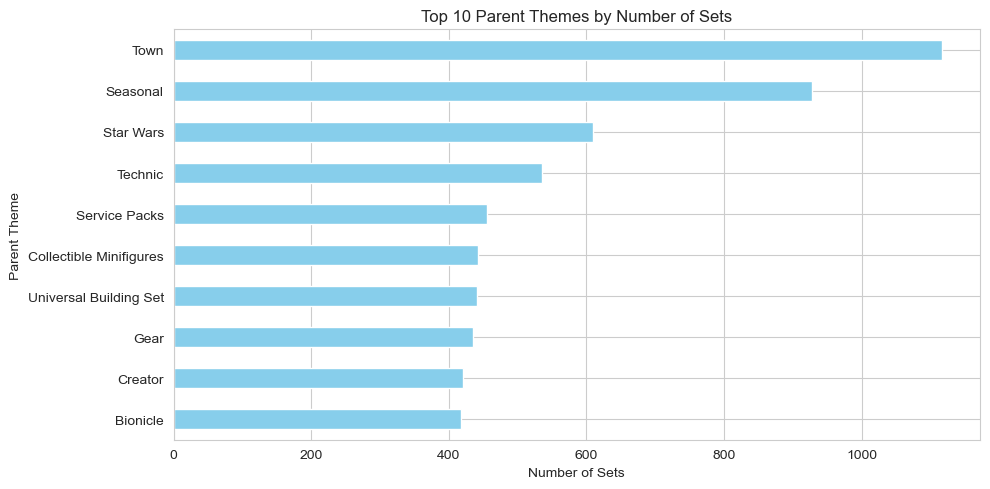

In [82]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set_style("whitegrid")

###############################################################################
# 1. BAR CHART: Top 10 Parent Themes by Count
###############################################################################
plt.figure(figsize=(10, 5))

# Count how many sets belong to each parent_theme
theme_counts = merged['parent_theme'].value_counts().head(10).sort_values()

# Create a horizontal bar chart
theme_counts.plot(kind='barh', color='skyblue')
plt.title("Top 10 Parent Themes by Number of Sets")
plt.xlabel("Number of Sets")
plt.ylabel("Parent Theme")
plt.tight_layout()
plt.show()


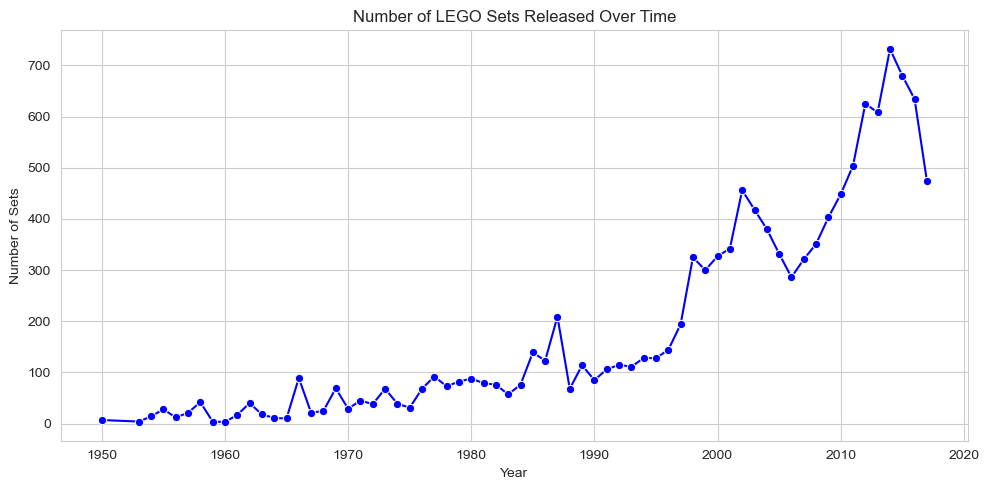

In [84]:
###############################################################################
# 2. LINE CHART: Count of Sets Released Each Year
###############################################################################
plt.figure(figsize=(10, 5))

# Group by 'year' and count sets
sets_per_year = merged.groupby('year').size().reset_index(name='count')

# Plot a line chart
sns.lineplot(data=sets_per_year, x='year', y='count', marker="o", color='blue')
plt.title("Number of LEGO Sets Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.tight_layout()
plt.show()



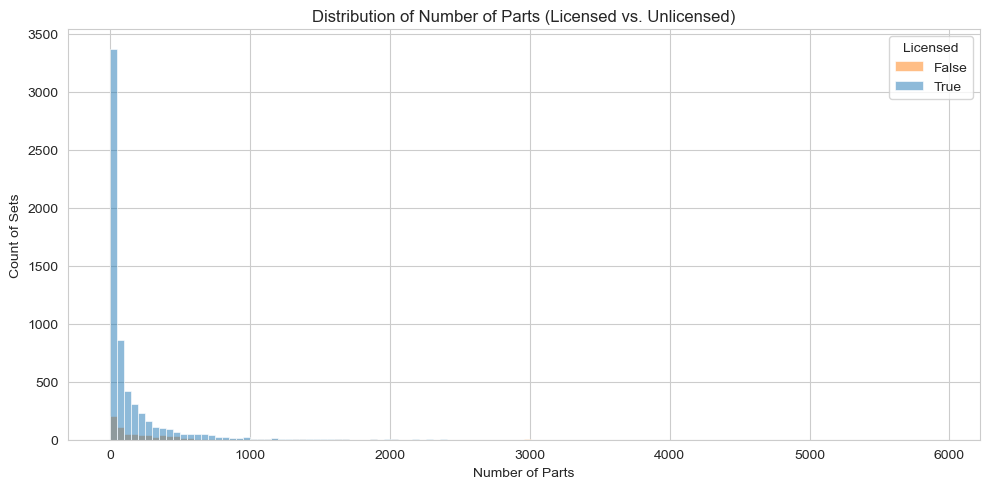

In [86]:
###############################################################################
# 3. HISTOGRAM: Distribution of num_parts (Split by Licensed vs. Unlicensed)
###############################################################################
plt.figure(figsize=(10, 5))

# Convert is_licensed to a string or categoric for clear labeling
merged['is_licensed_str'] = merged['is_licensed'].astype(str)

# Create a histogram using seaborn's FacetGrid or simply a hue in histplot
sns.histplot(data=merged, x='num_parts', hue='is_licensed_str', kde=False, binwidth=50)
plt.title("Distribution of Number of Parts (Licensed vs. Unlicensed)")
plt.xlabel("Number of Parts")
plt.ylabel("Count of Sets")
plt.legend(title="Licensed", labels=["False", "True"])
plt.tight_layout()
plt.show()



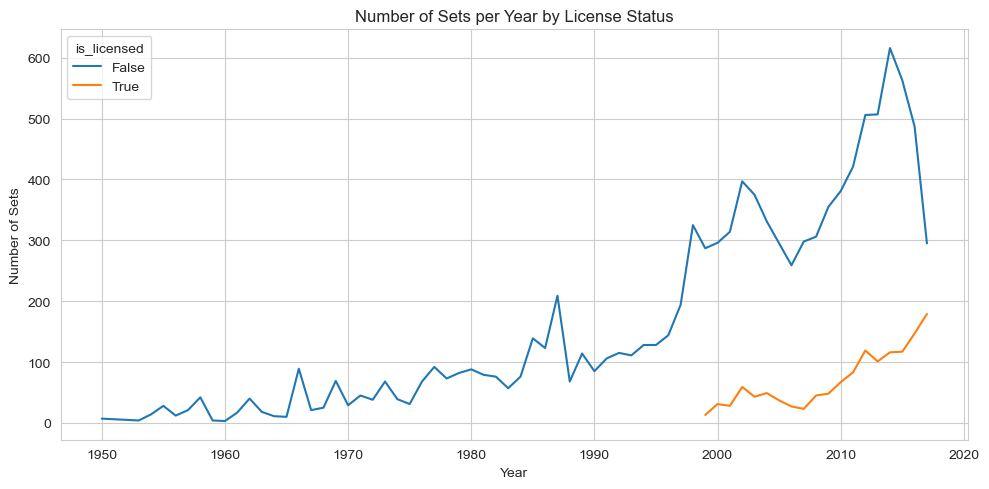

In [88]:
###############################################################################
# 4. Count of Licensed vs. Unlicensed Sets per Year
###############################################################################
plt.figure(figsize=(10, 5))

# Group by year and licensed status, then count
year_license_counts = (merged
                       .groupby(['year', 'is_licensed'])
                       .size()
                       .reset_index(name='count'))

# Plot as a line chart with hue for licensed/unlicensed
sns.lineplot(data=year_license_counts, x='year', y='count', hue='is_licensed')
plt.title("Number of Sets per Year by License Status")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.tight_layout()
plt.show()